In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline


# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/loisstetson/Project-4-Cost-of-Living/main/cost_of_living_us.csv')

# Display the first few rows of the dataset
data

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,3171,WY,False,"Weston County, WY",Weston County,2p0c,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.656250
31426,3171,WY,False,"Weston County, WY",Weston County,2p1c,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.656250
31427,3171,WY,False,"Weston County, WY",Weston County,2p2c,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.656250
31428,3171,WY,False,"Weston County, WY",Weston County,2p3c,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.656250


In [45]:
# Check for missing values
print(data.isnull().sum())

case_id                    0
state                      0
isMetro                    0
areaname                   0
county                     0
family_member_count        0
housing_cost               0
food_cost                  0
transportation_cost        0
healthcare_cost            0
other_necessities_cost     0
childcare_cost             0
taxes                      0
total_cost                 0
median_family_income      10
dtype: int64


In [46]:
# Dropping rows with NaN in 'GeoLocation' and dropping the 'nametype' column
data_cleaned = data.drop(columns=['case_id'])

data_cleaned

,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,WY,False,"Weston County, WY",Weston County,2p0c,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.656250
31426,WY,False,"Weston County, WY",Weston County,2p1c,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.656250
31427,WY,False,"Weston County, WY",Weston County,2p2c,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.656250
31428,WY,False,"Weston County, WY",Weston County,2p3c,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.656250


In [47]:
# Make a copy of the dataset
data_cleaned_copy = data_cleaned[~data_cleaned['median_family_income'].isna()].copy()

# Split family member count into 2 separate columns by 'p' delimiter
data_cleaned_copy[['number_of_parents', 'number_of_children']] = data_cleaned_copy['family_member_count'].str.split('p', expand=True)

# Get rid of trailing 'c' symbol in the number of children column
data_cleaned_copy['number_of_children'] = data_cleaned_copy['number_of_children'].str.rstrip('c')

# Change data types of these 2 columns into integer type
data_cleaned_copy = data_cleaned_copy.astype({'number_of_parents': np.int8, 'number_of_children': np.int8})

# Make a new column family size
data_cleaned_copy['family_size'] = data_cleaned_copy['number_of_parents'] + data_cleaned_copy['number_of_children']

# Display the updated DataFrame
data_cleaned_copy.head(10)

,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,number_of_parents,number_of_children,family_size
0,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1,0,1
1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1,1,2
2,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1,2,3
3,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,1,3,4
4,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,1,4,5
5,AL,True,"Montgomery, AL MSA",Autauga County,2p0c,10180.29420,6334.01436,12861.88680,11474.95968,5983.78524,0.0000,8236.73076,55071.6684,73010.414062,2,0,2
6,AL,True,"Montgomery, AL MSA",Autauga County,2p1c,12067.50240,7883.31888,13589.11200,14397.03720,7228.96944,6147.8298,9459.90240,70773.6744,73010.414062,2,1,3
7,AL,True,"Montgomery, AL MSA",Autauga County,2p2c,12067.50240,9984.05268,14723.60760,17319.11280,7990.14840,15824.6940,11168.75028,89077.8696,73010.414062,2,2,4
8,AL,True,"Montgomery, AL MSA",Autauga County,2p3c,15257.15040,12189.77040,14994.60000,20241.18720,9945.10176,18802.1892,13210.14840,104640.1524,73010.414062,2,3,5
9,AL,True,"Montgomery, AL MSA",Autauga County,2p4c,15257.15040,14917.35840,15064.26360,23163.26520,10933.41504,18802.1892,13417.21920,111554.8596,73010.414062,2,4,6


In [ ]:
data_cleaned_copy.to_csv('data_cleaned.csv', index=False)


In [48]:
# Basic statistics to identify outliers
print("\nBasic Statistical Details:\n", data_cleaned_copy.describe())


Basic Statistical Details:
        housing_cost     food_cost  transportation_cost  healthcare_cost  \
count  31420.000000  31420.000000         31420.000000     31420.000000   
mean   11073.359622   8287.654372         13593.989839     13393.008581   
std     4166.013774   3271.226843          1640.569523      5204.016778   
min     4209.311280   2220.276840          2216.461440      3476.379960   
25%     8580.000000   5801.424360         12535.204200      9667.440000   
50%    10416.000000   8129.156280         13698.315000     13082.514000   
75%    12444.000000  10703.624280         14765.867400     16657.816800   
max    61735.587600  31178.619600         19816.482000     37252.274400   

       other_necessities_cost  childcare_cost         taxes     total_cost  \
count            31420.000000    31420.000000  31420.000000   31420.000000   
mean              7015.258917     9879.247416   7657.101541   70899.620274   
std               2397.562090     6778.325756   3339.914200  

In [49]:
# Check data types for inconsistencies
print("\nData Types:\n", data_cleaned_copy.dtypes)


Data Types:
 state                      object
isMetro                      bool
areaname                   object
county                     object
family_member_count        object
housing_cost              float64
food_cost                 float64
transportation_cost       float64
healthcare_cost           float64
other_necessities_cost    float64
childcare_cost            float64
taxes                     float64
total_cost                float64
median_family_income      float64
number_of_parents            int8
number_of_children           int8
family_size                  int8
dtype: object


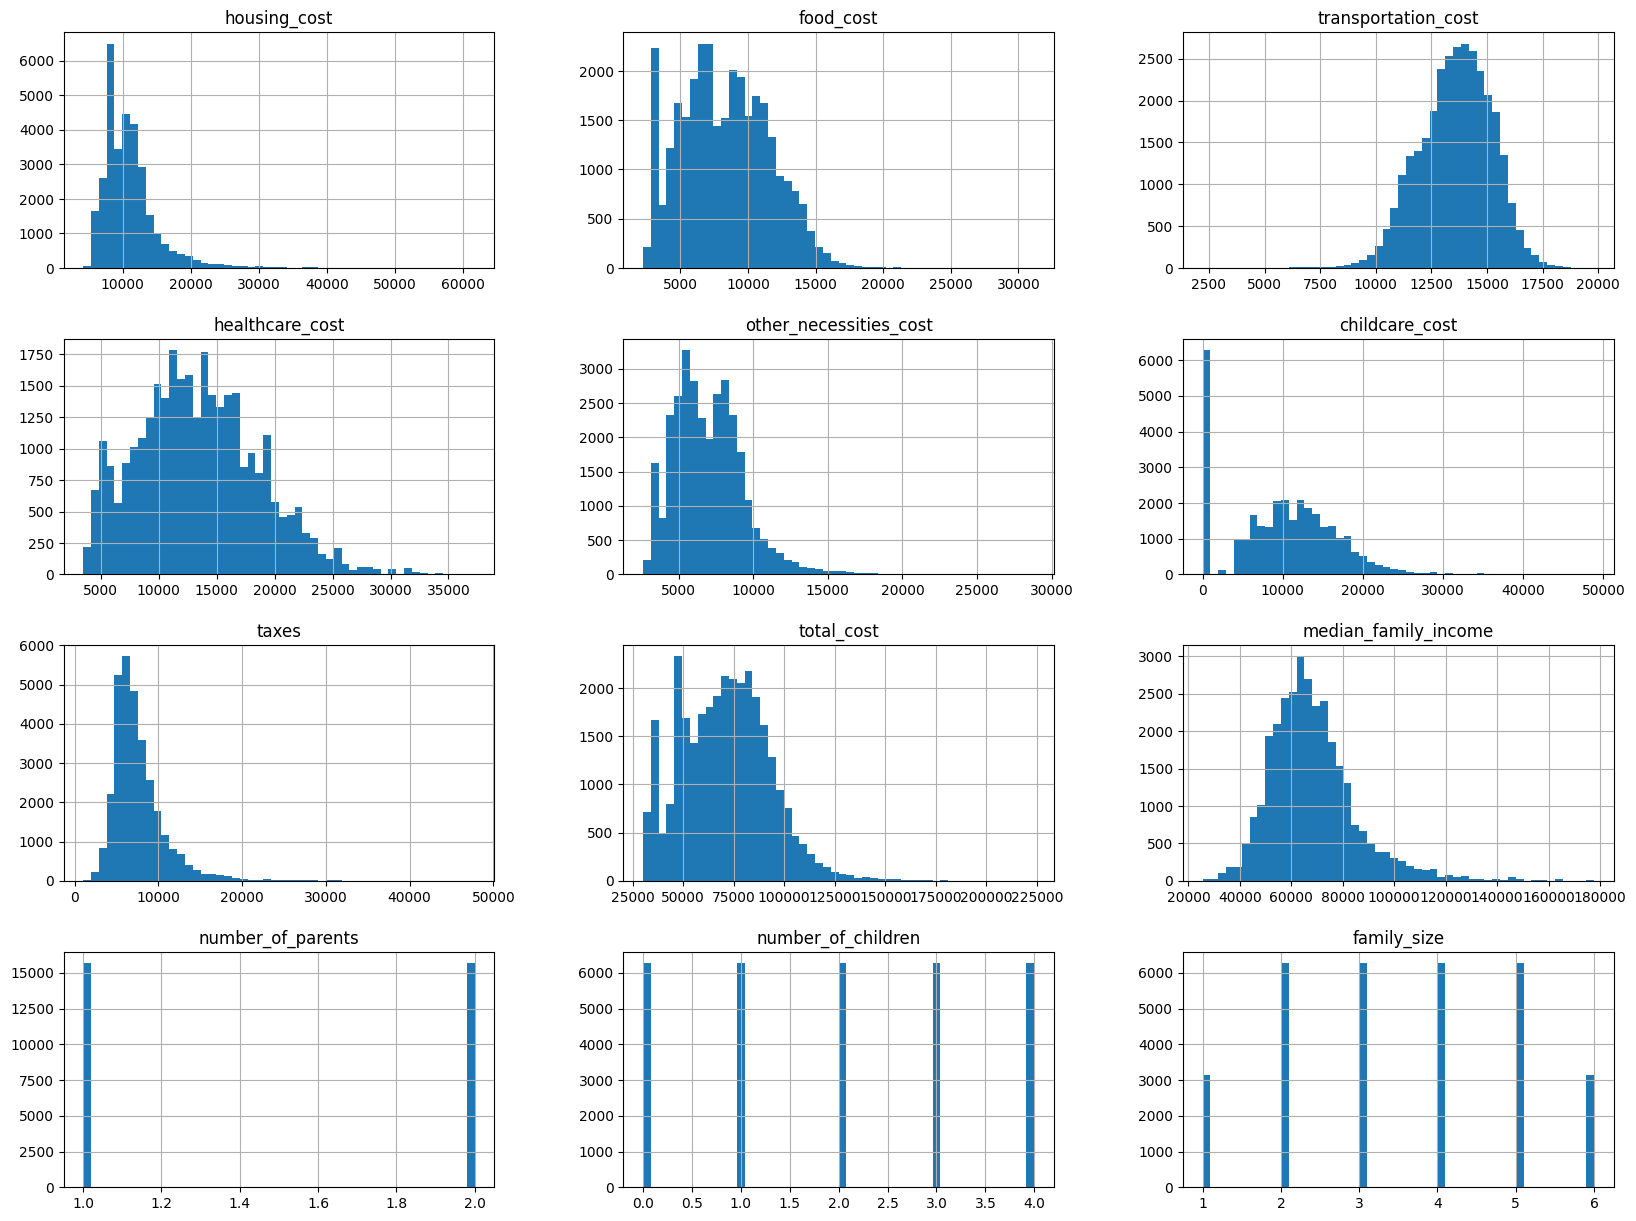

In [50]:
# Histograms for distribution
data_cleaned_copy.hist(bins=50, figsize=(20,15))
plt.show()

<ipython-input-51-f88a68085118>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_cleaned_copy.corr()


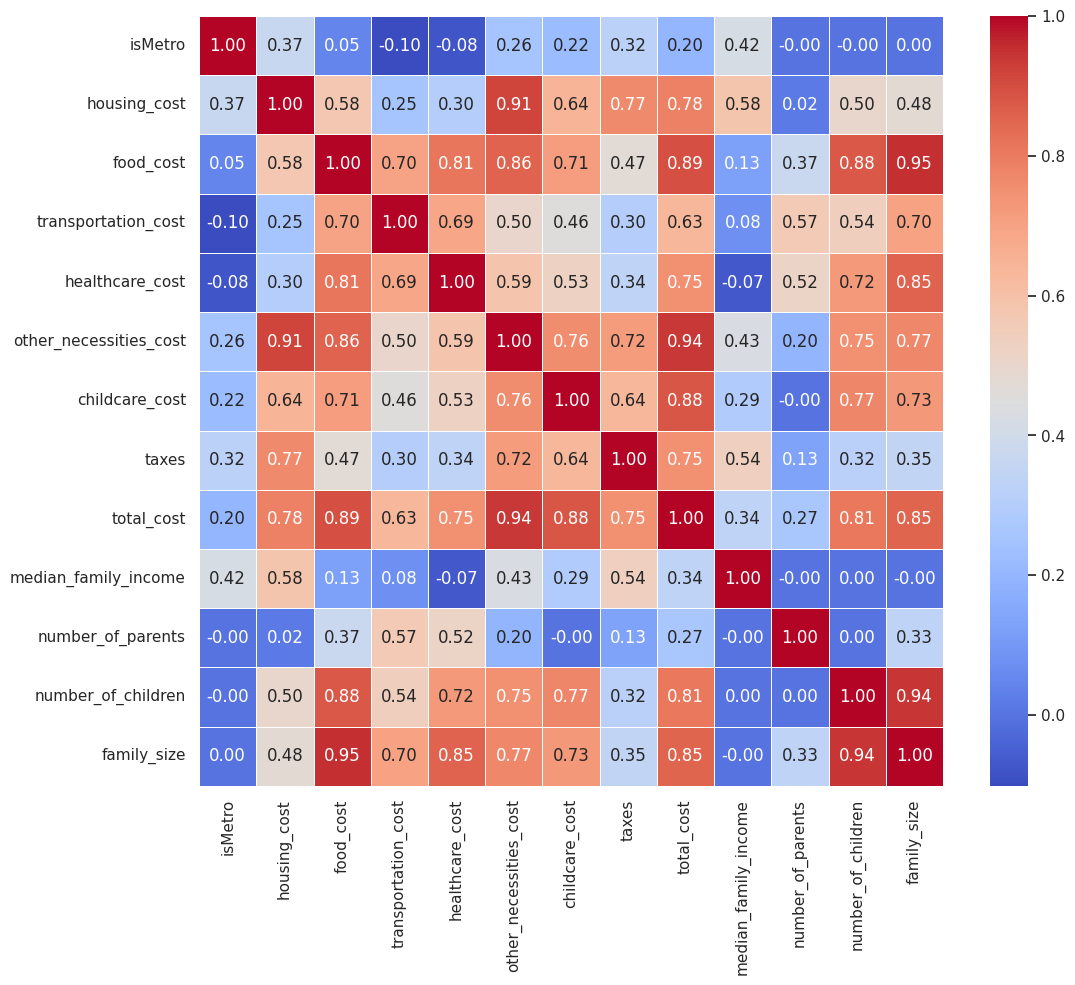

In [51]:
# Set the figure size
sns.set(rc={'figure.figsize':(12, 10)})

# Correlation matrix
correlation_matrix = data_cleaned_copy.corr()

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

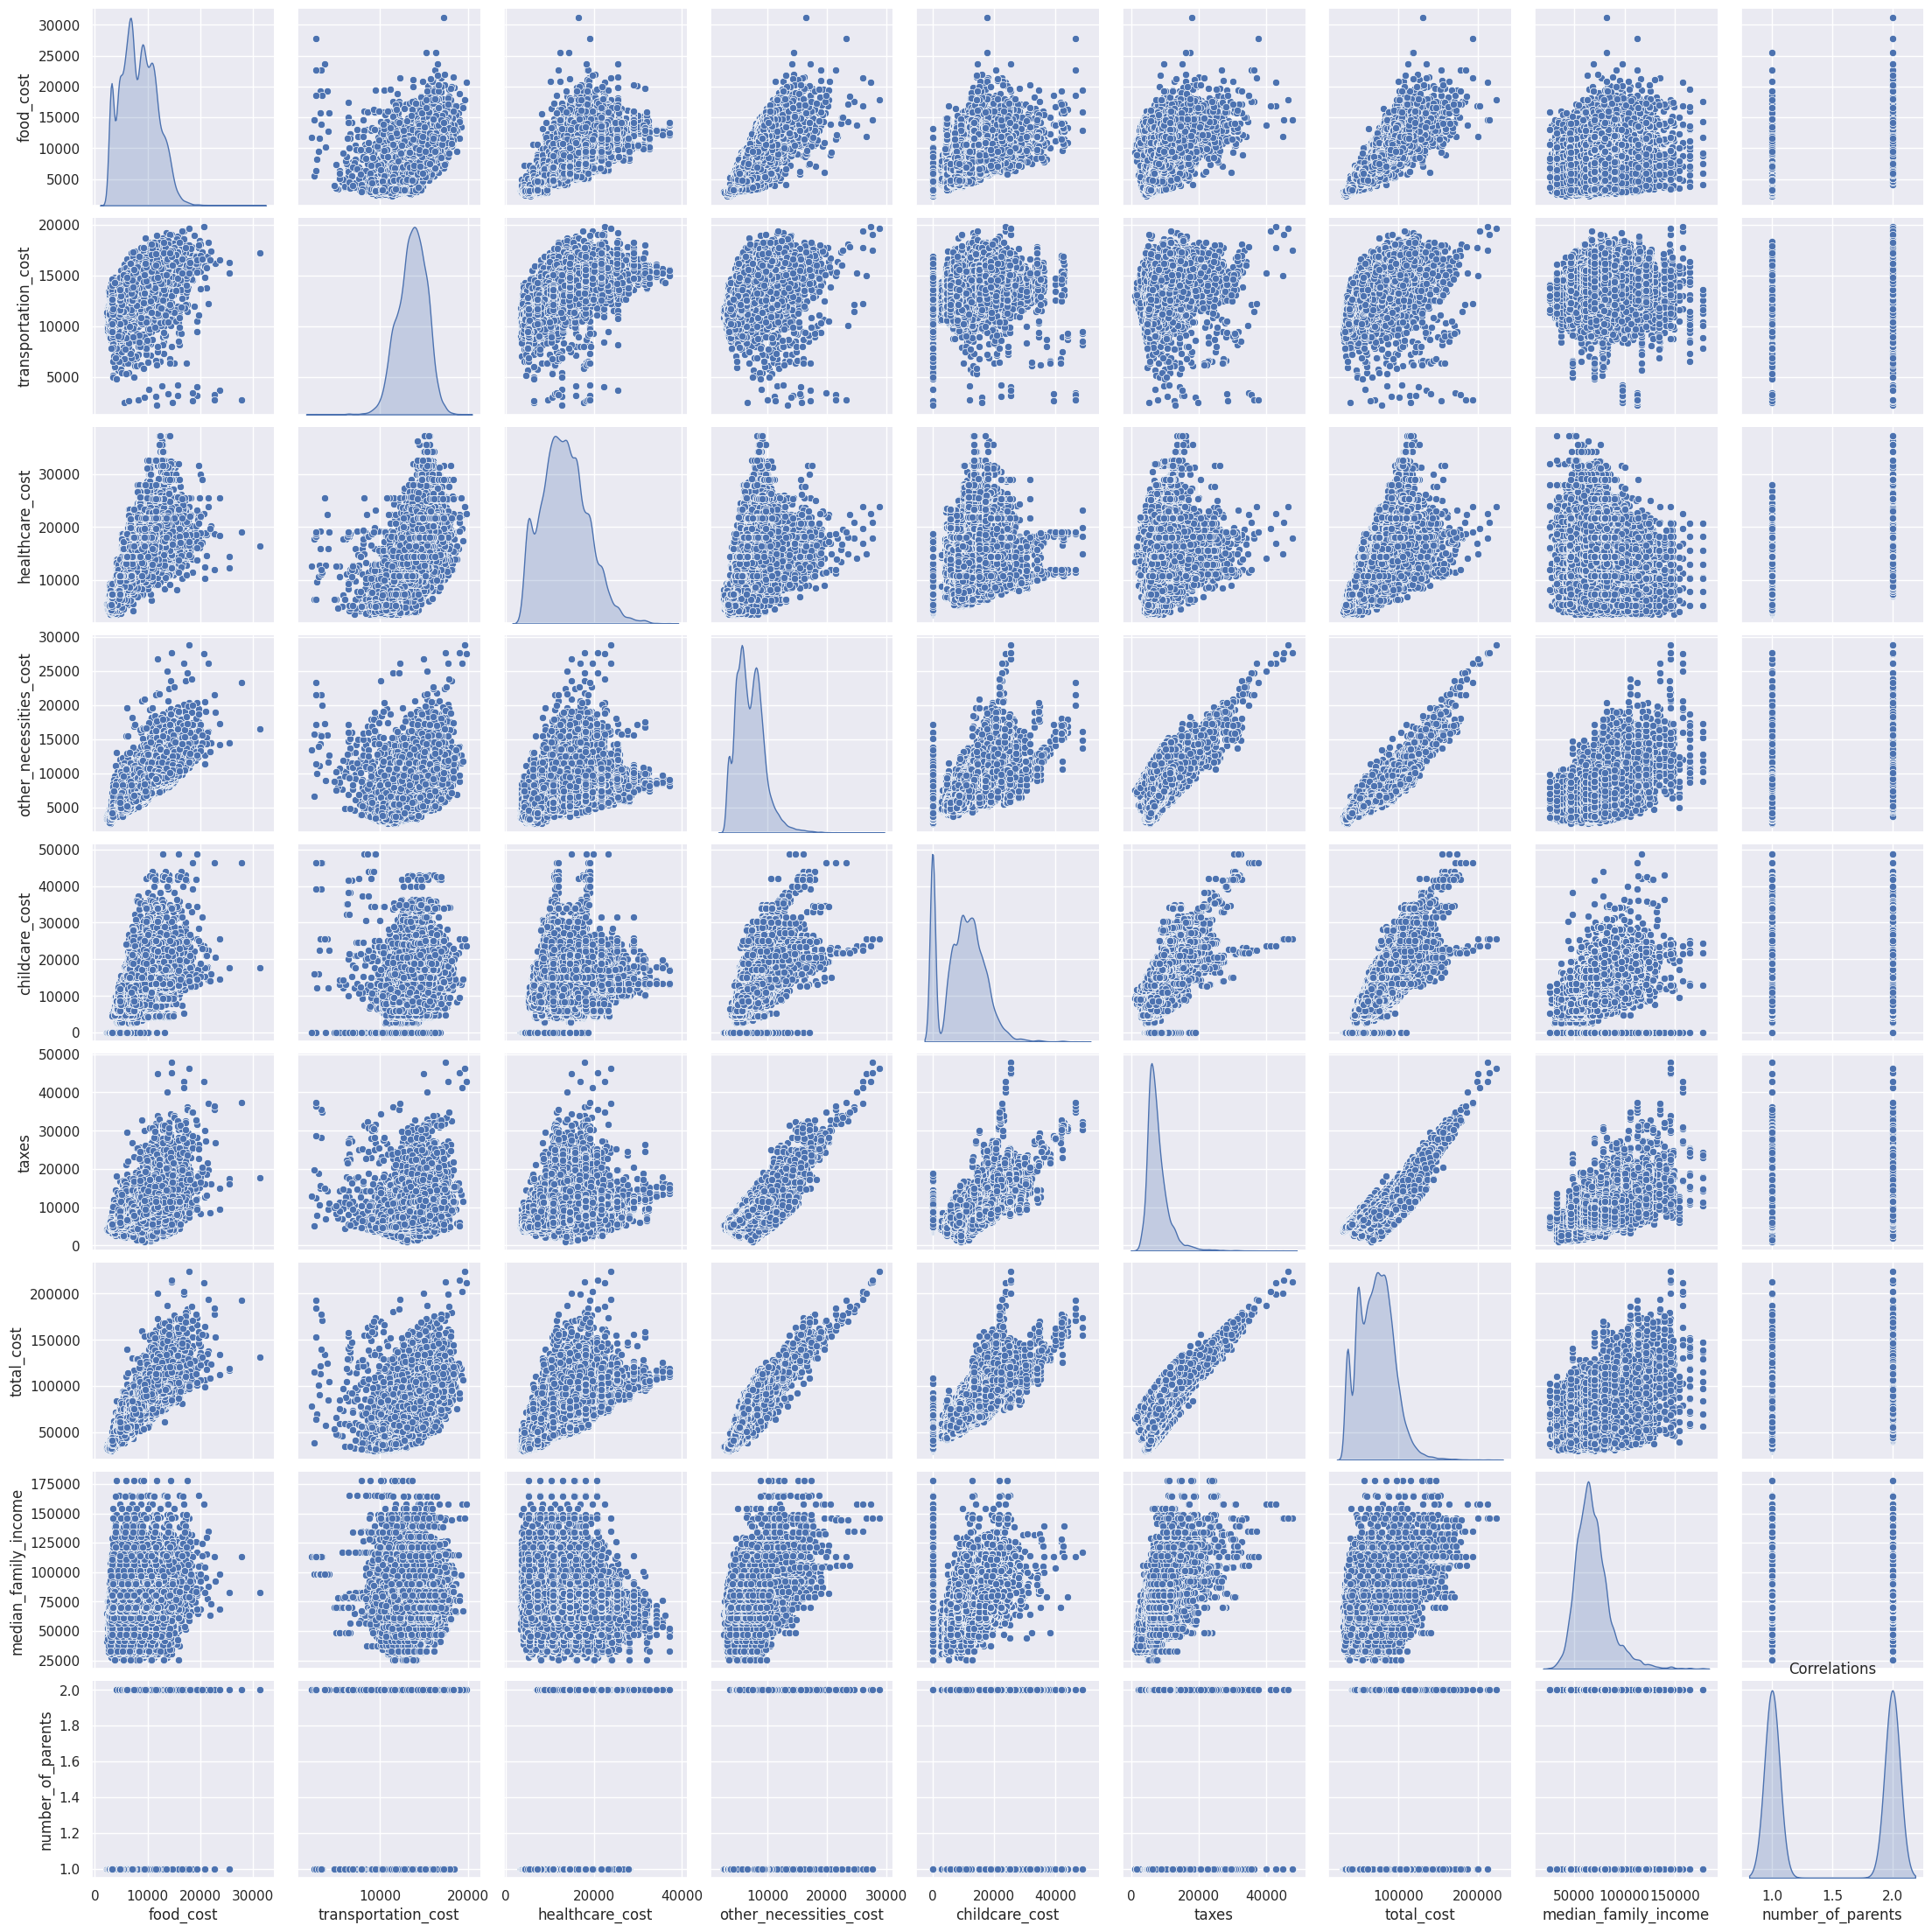

In [52]:
# Create plot
sns.pairplot(data_cleaned_copy.iloc[:, 6:15], diag_kind='kde')

# Configure the plot
plt.title('Correlations')

# Display the plot
plt.show()

In [53]:
# One-hot encoding
data_encoded = pd.get_dummies(data_cleaned_copy, columns=['state', 'isMetro', 'areaname', 'county','family_member_count'])

data_encoded

,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,number_of_parents,...,family_member_count_1p0c,family_member_count_1p1c,family_member_count_1p2c,family_member_count_1p3c,family_member_count_1p4c,family_member_count_2p0c,family_member_count_2p1c,family_member_count_2p2c,family_member_count_2p3c,family_member_count_2p4c
0,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1,...,1,0,0,0,0,0,0,0,0,0
1,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1,...,0,1,0,0,0,0,0,0,0,0
2,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1,...,0,0,1,0,0,0,0,0,0,0
3,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,1,...,0,0,0,1,0,0,0,0,0,0
4,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.656250,2,...,0,0,0,0,0,1,0,0,0,0
31426,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.656250,2,...,0,0,0,0,0,0,1,0,0,0
31427,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.656250,2,...,0,0,0,0,0,0,0,1,0,0
31428,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.656250,2,...,0,0,0,0,0,0,0,0,1,0


In [54]:
# Load dataset
iris = load_iris()
X = iris.data  # features
y = iris.target  # target variable

In [55]:
#compress the data by elimnating non numerical columns
data_compressed = data_cleaned_copy.drop(columns=['state', 'isMetro', 'areaname', 'county', 'family_member_count'])
data_compressed

,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,number_of_parents,number_of_children,family_size
0,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1,0,1
1,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1,1,2
2,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1,2,3
3,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,1,3,4
4,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
31425,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.656250,2,0,2
31426,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.656250,2,1,3
31427,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.656250,2,2,4
31428,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.656250,2,3,5


In [56]:
# Separate features and target
X = data_compressed.drop('food_cost', axis=1)
y = data_compressed['family_size']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

#excluding the target column for scaling
features = data_compressed.drop('food_cost', axis=1)
scaled_features = scaler.fit_transform(features)

# Replace original features with scaled features
data_compressed.loc[:, features.columns] = scaled_features

<ipython-input-57-c6bff69f9e0b>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_compressed.loc[:, features.columns] = scaled_features


In [58]:
# Drop rows with missing values in both features and target variable
missing_rows = X_train.index.intersection(y_train.index)
X_train = X_train.loc[missing_rows].dropna()
y_train = y_train.loc[missing_rows]  # Ensure consistency in shape
y_train = y_train.to_numpy().ravel()  # Convert to a 1D array using ravel()

# Now fit the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
# Drop rows with missing values
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

# Predict and evaluate the model
y_pred = model.predict(X_test)


In [60]:
y_test = y_test.round()

In [61]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

mse

0.19318905155951624

In [62]:
import os
# Find the latest version of spark 3.x  from http://www.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.5.0'
spark_version = 'spark-3.5.0'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Start a SparkSession
import findspark
findspark.init()

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Fetched 229 kB in 1s (181 kB/s)
Reading package lists... Done


In [63]:
# Import packages
from pyspark.sql import SparkSession
import time

# Create a SparkSession
spark = SparkSession.builder.appName("SparkSQL").getOrCreate()

In [64]:
# 2. Create a temporary view of the DataFrame.

df.createOrReplaceTempView("cost_of_living")

In [65]:
# 1. Read in data into a DataFrame.
from pyspark import SparkFiles
url = "https://raw.githubusercontent.com/loisstetson/Project-4-Cost-of-Living/main/Resources/data_cleaned.csv"

spark.sparkContext.addFile(url)

# Read the CSV file into a DataFrame
file_name = "data_cleaned.csv"
df2 = spark.read.csv(SparkFiles.get(file_name),
                     sep=",",
                     header=True,
                     ignoreLeadingWhiteSpace=True)

# Display the first few rows of the DataFrame
df2.show(5)

Py4JJavaError: ignored

In [67]:
# 3. What is the average food_cost for a four people household rounded to two decimal places?

from pyspark.sql.functions import avg, round

# Filter for four-bedroom houses
four_household = df.filter(df.family_size == 4)

# Group by county and calculate the average price
average_food_cost = four_household.groupBy("county")\
    .agg(round(avg("food_cost"), 2).alias("average_food_cost"))

# Show the results
average_food_cost.show()

AttributeError: ignored

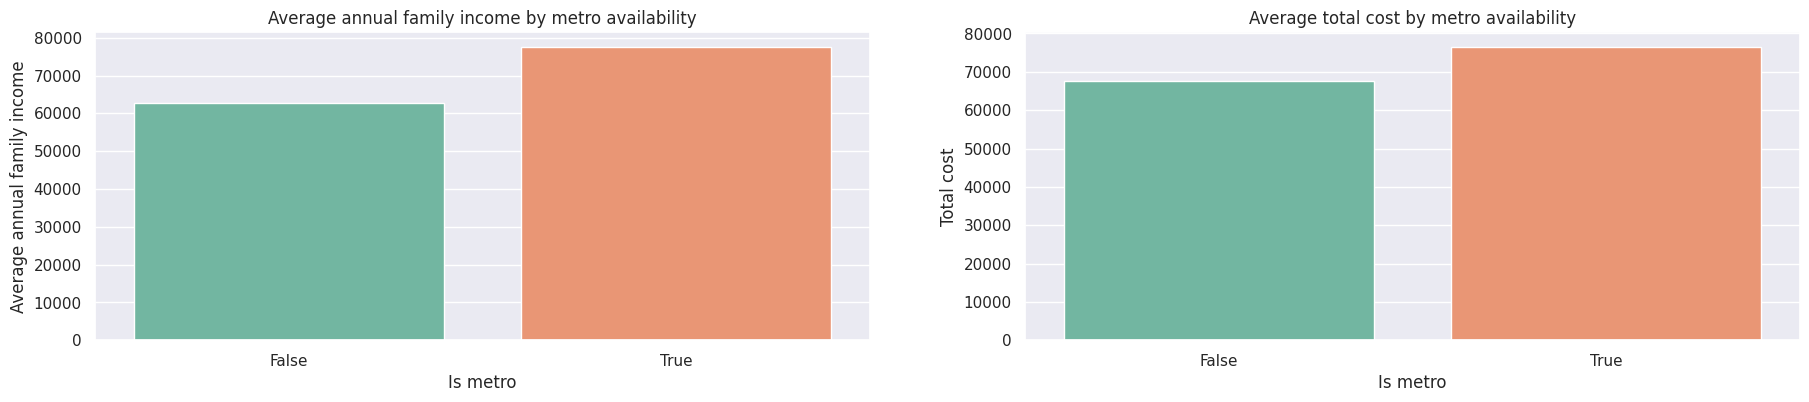

In [68]:
# Group by metro availability and calculate the mean annual living cost for both cases
metro = data_cleaned_copy.groupby('isMetro')['total_cost'].agg('mean')
metro_income = data_cleaned_copy.groupby('isMetro')['median_family_income'].agg('mean')

# Create a color palette for the plots
palette = sns.color_palette("Set2")

# Create figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 4))

# Create a barplot for average annual family income
sns.barplot(x=metro_income.index, y=metro_income.values, ax=ax[0], palette=palette)

# Configure the plot
ax[0].set_title('Average annual family income by metro availability')
ax[0].set_xlabel('Is metro')
ax[0].set_ylabel('Average annual family income')

# Create a barplot for average total cost
sns.barplot(x=metro.index, y=metro.values, ax=ax[1], palette=palette)

# Configure the plot
ax[1].set_title('Average total cost by metro availability')
ax[1].set_xlabel('Is metro')
ax[1].set_ylabel('Total cost')

# Display the plot
plt.show()

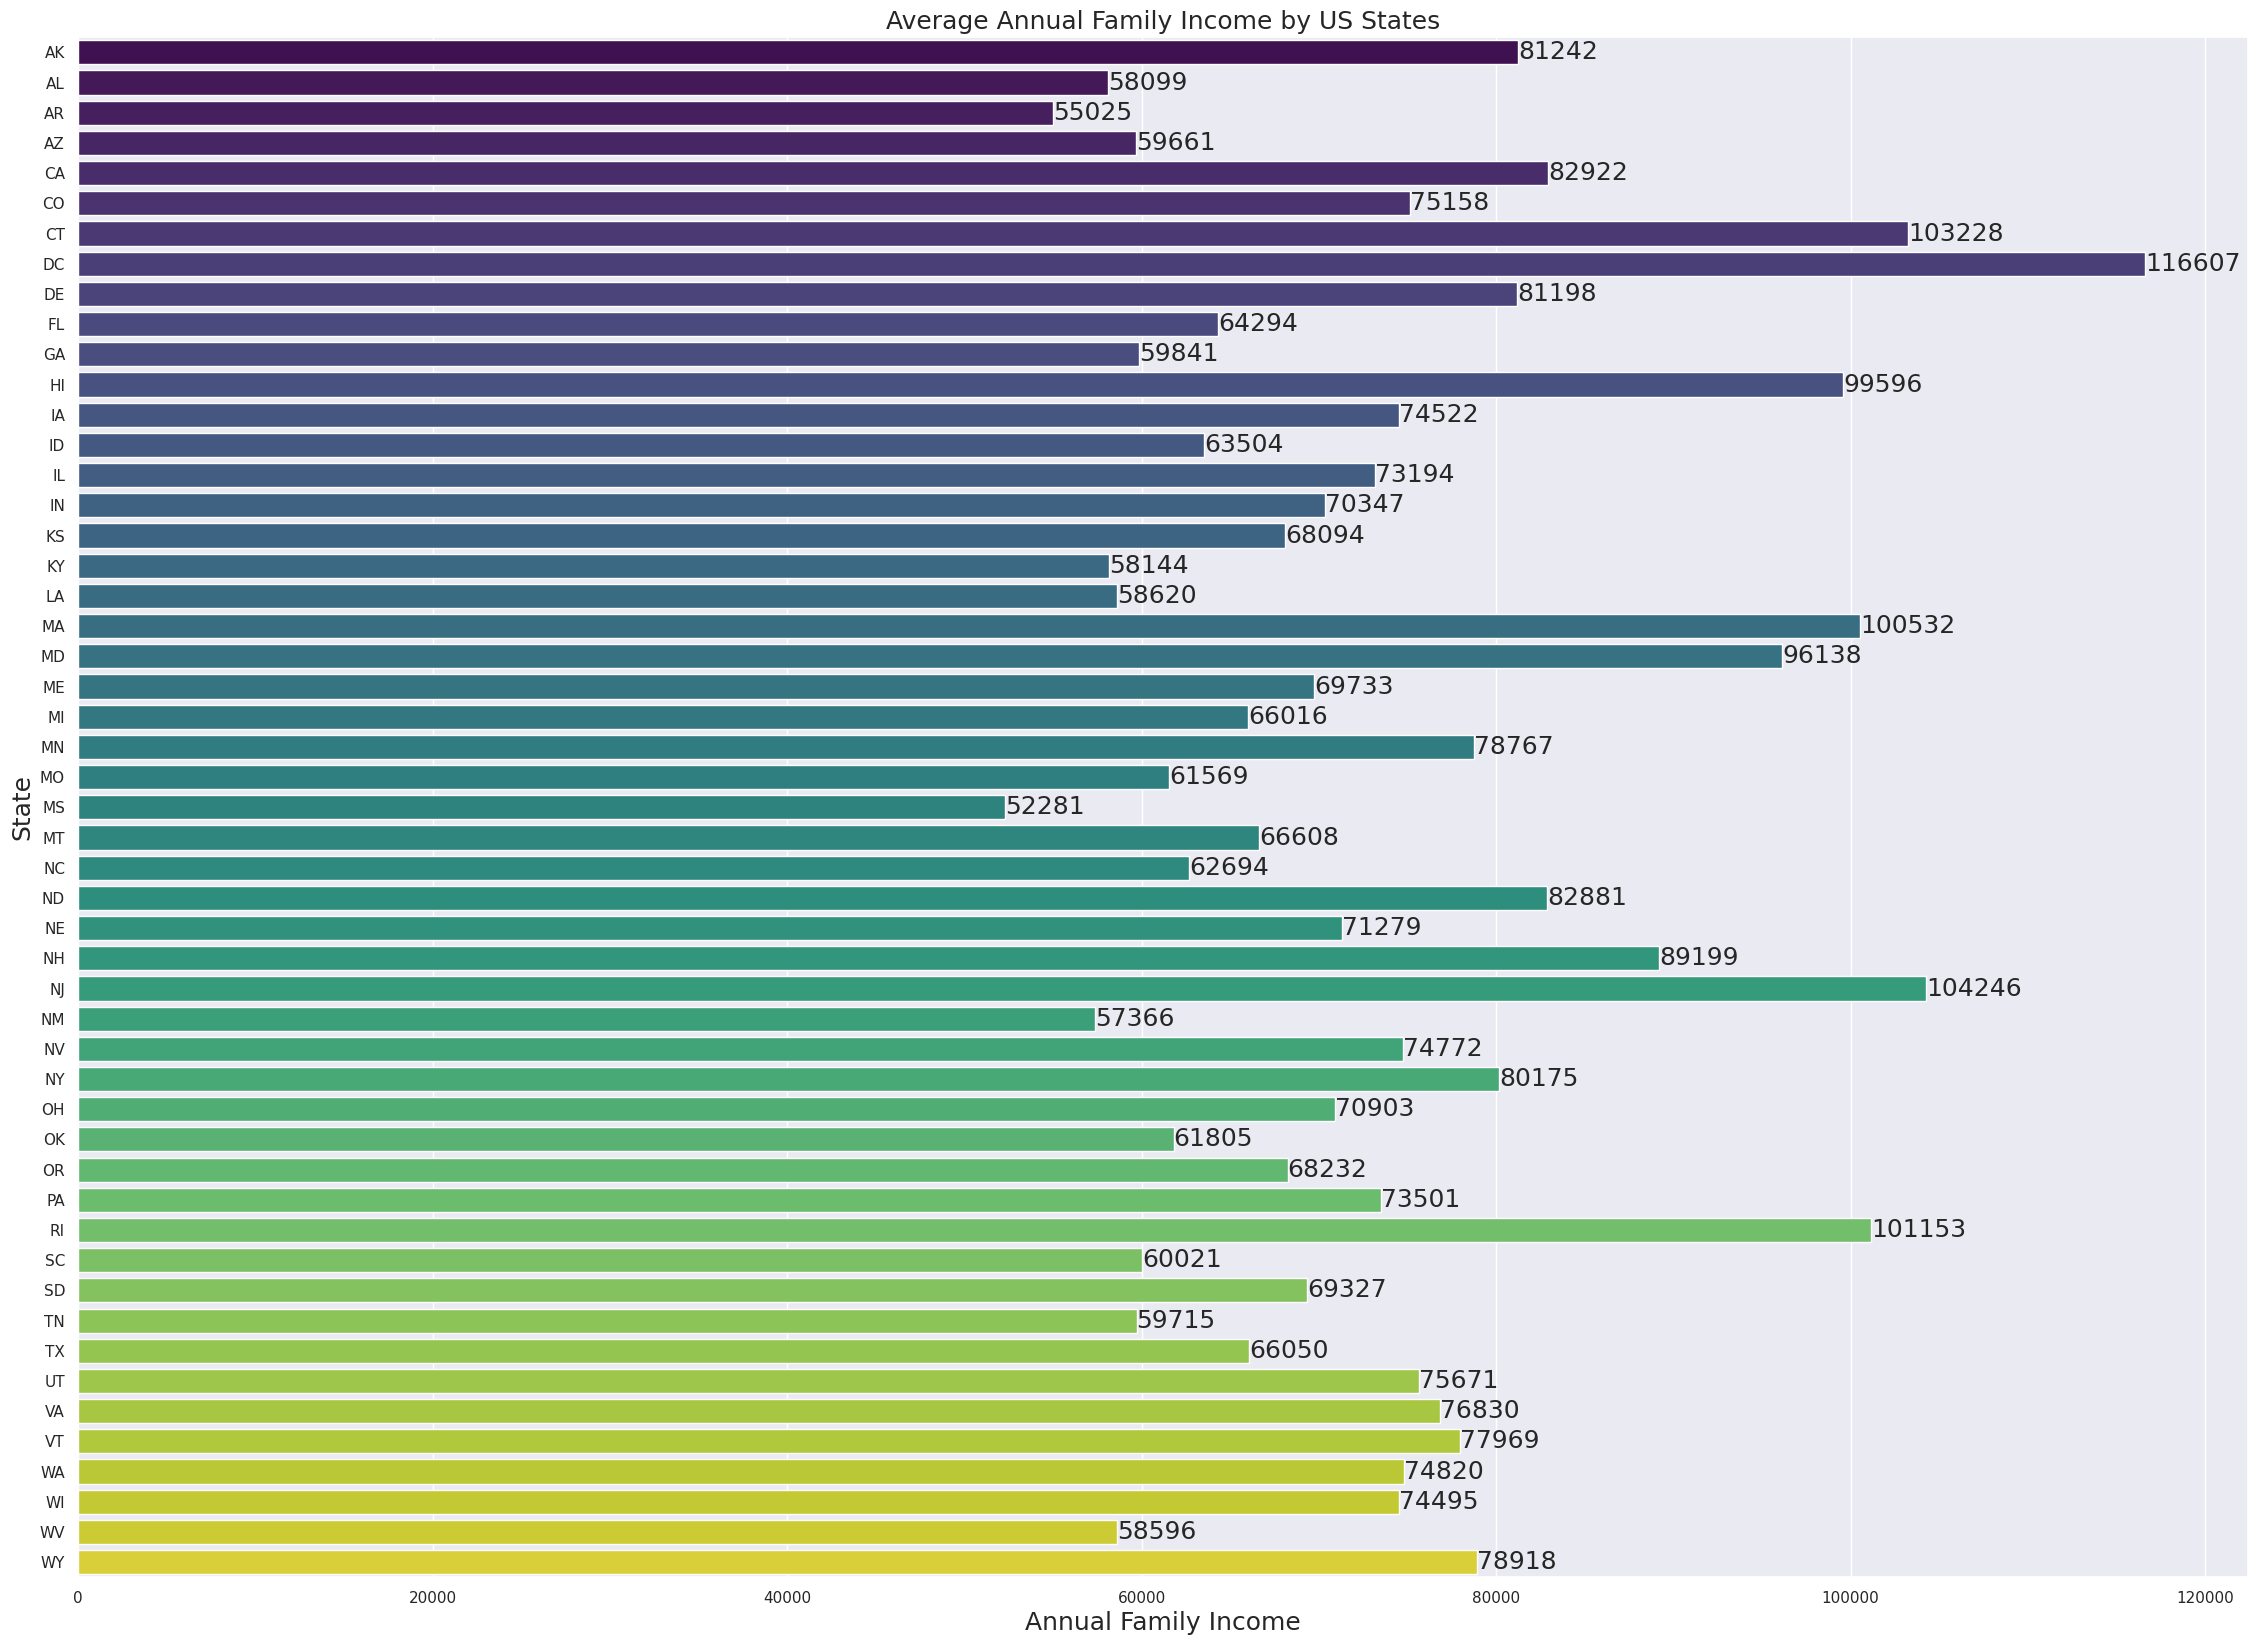

In [111]:
# Create a cool and colorful plot
plt.figure(figsize=(28, 20))
colors = sns.color_palette('viridis', len(average_income_by_states))

# Create a horizontal bar plot
ax = sns.barplot(x=average_income_by_states.values, y=average_income_by_states.index, palette=colors)

# Set bar annotations
ax.bar_label(ax.containers[0], fontsize=18, fmt='%d')

# Configure the plot
plt.title('Average Annual Family Income by US States', fontsize=18)
plt.xlabel('Annual Family Income', fontsize=18)
plt.ylabel('State', fontsize=18)

# Show the plot
plt.show()


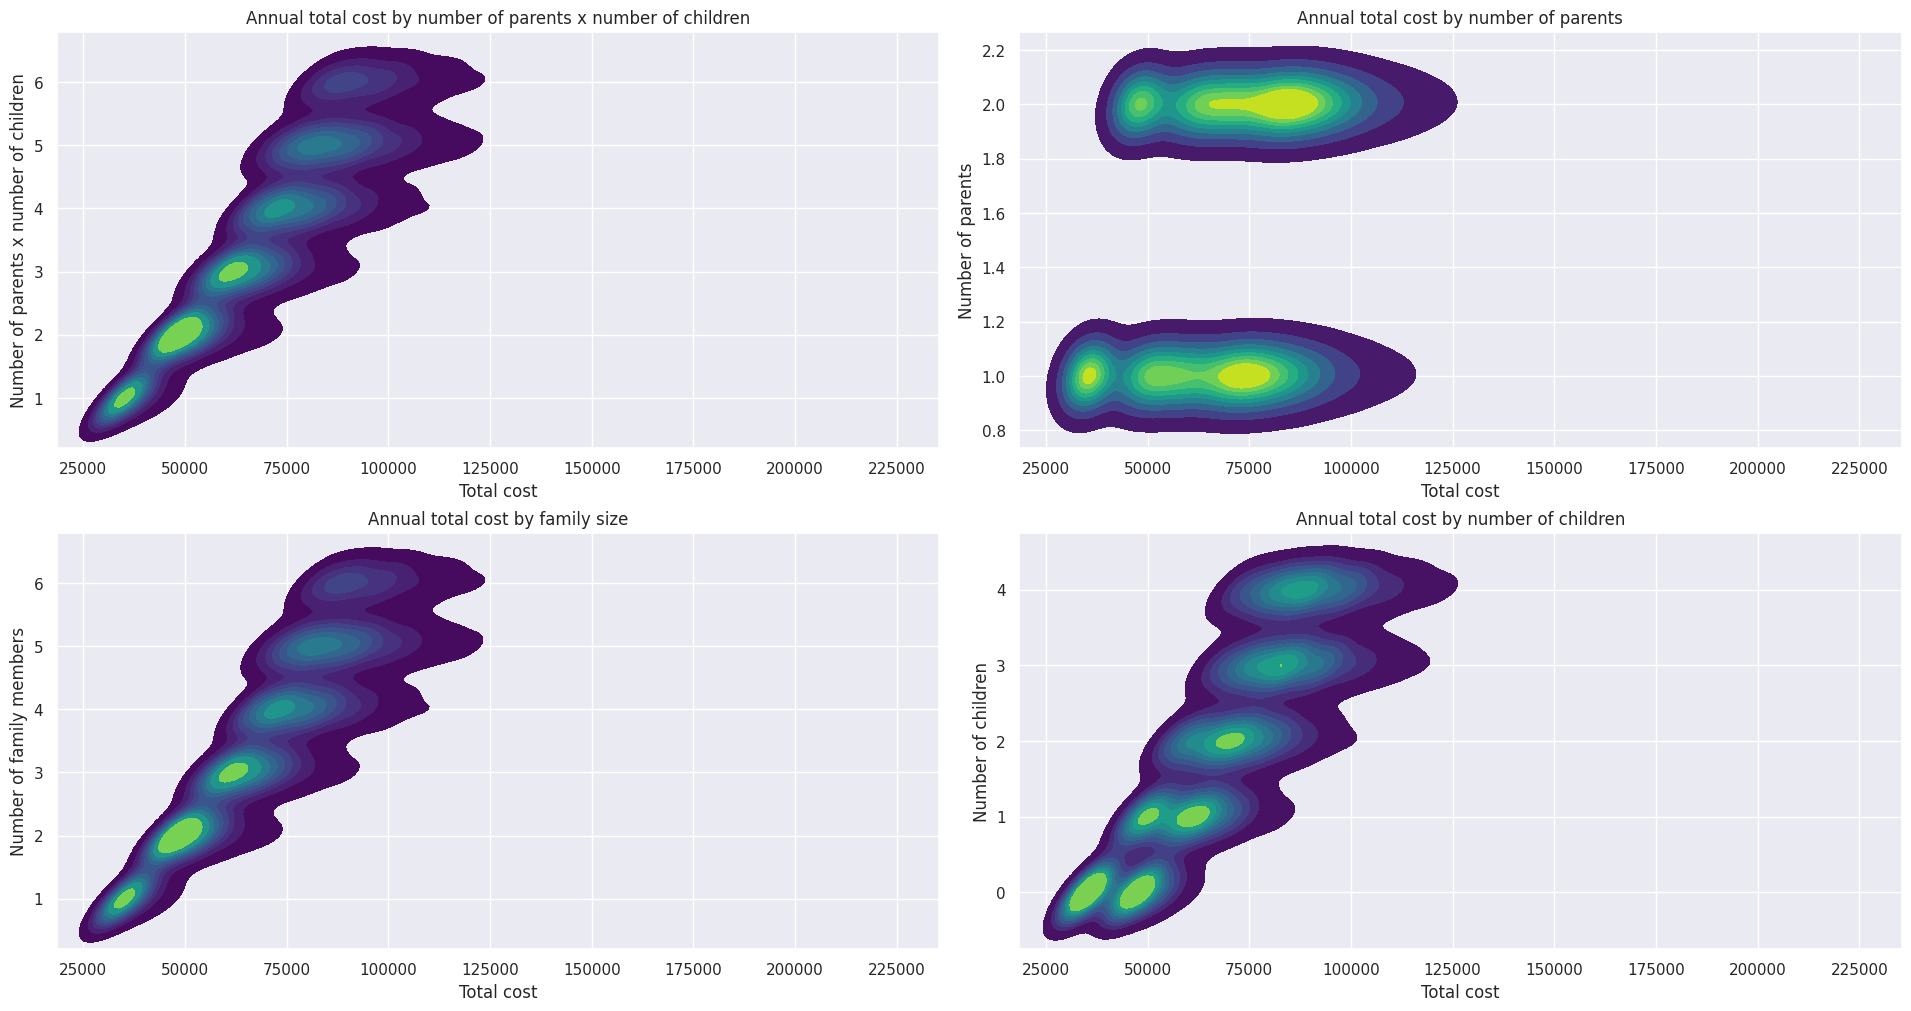

In [86]:
# Create figure and axes with a cool color palette
fig, ax = plt.subplots(2, 2, figsize=(19, 10), constrained_layout=True)
colors = sns.color_palette('mako_r', n_colors=5)  # Change 'mako_r' to your preferred color palette

# Create area plots
sns.kdeplot(data=data_cleaned_copy, x='total_cost', y='family_size', fill=True, ax=ax[0, 0], cmap='viridis')

# Configure the plot
ax[0, 0].set_title('Annual total cost by number of parents x number of children')
ax[0, 0].set_xlabel('Total cost')
ax[0, 0].set_ylabel('Number of parents x number of children')

# Create area plots
sns.kdeplot(data=data_cleaned_copy, x='total_cost', y='number_of_parents', fill=True, ax=ax[0, 1], cmap='viridis')

# Configure the plot
ax[0, 1].set_title('Annual total cost by number of parents')
ax[0, 1].set_xlabel('Total cost')
ax[0, 1].set_ylabel('Number of parents')

# Create area plots
sns.kdeplot(data=data_cleaned_copy, x='total_cost', y='family_size', fill=True, ax=ax[1, 0], cmap='viridis')

# Configure the plot
ax[1, 0].set_title('Annual total cost by family size')
ax[1, 0].set_xlabel('Total cost')
ax[1, 0].set_ylabel('Number of family members')

# Create area plots
sns.kdeplot(data=data_cleaned_copy, x='total_cost', y='number_of_children', fill=True, ax=ax[1, 1], cmap='viridis')

# Configure the plot
ax[1, 1].set_title('Annual total cost by number of children')
ax[1, 1].set_xlabel('Total cost')
ax[1, 1].set_ylabel('Number of children')

# Display plots
plt.show()




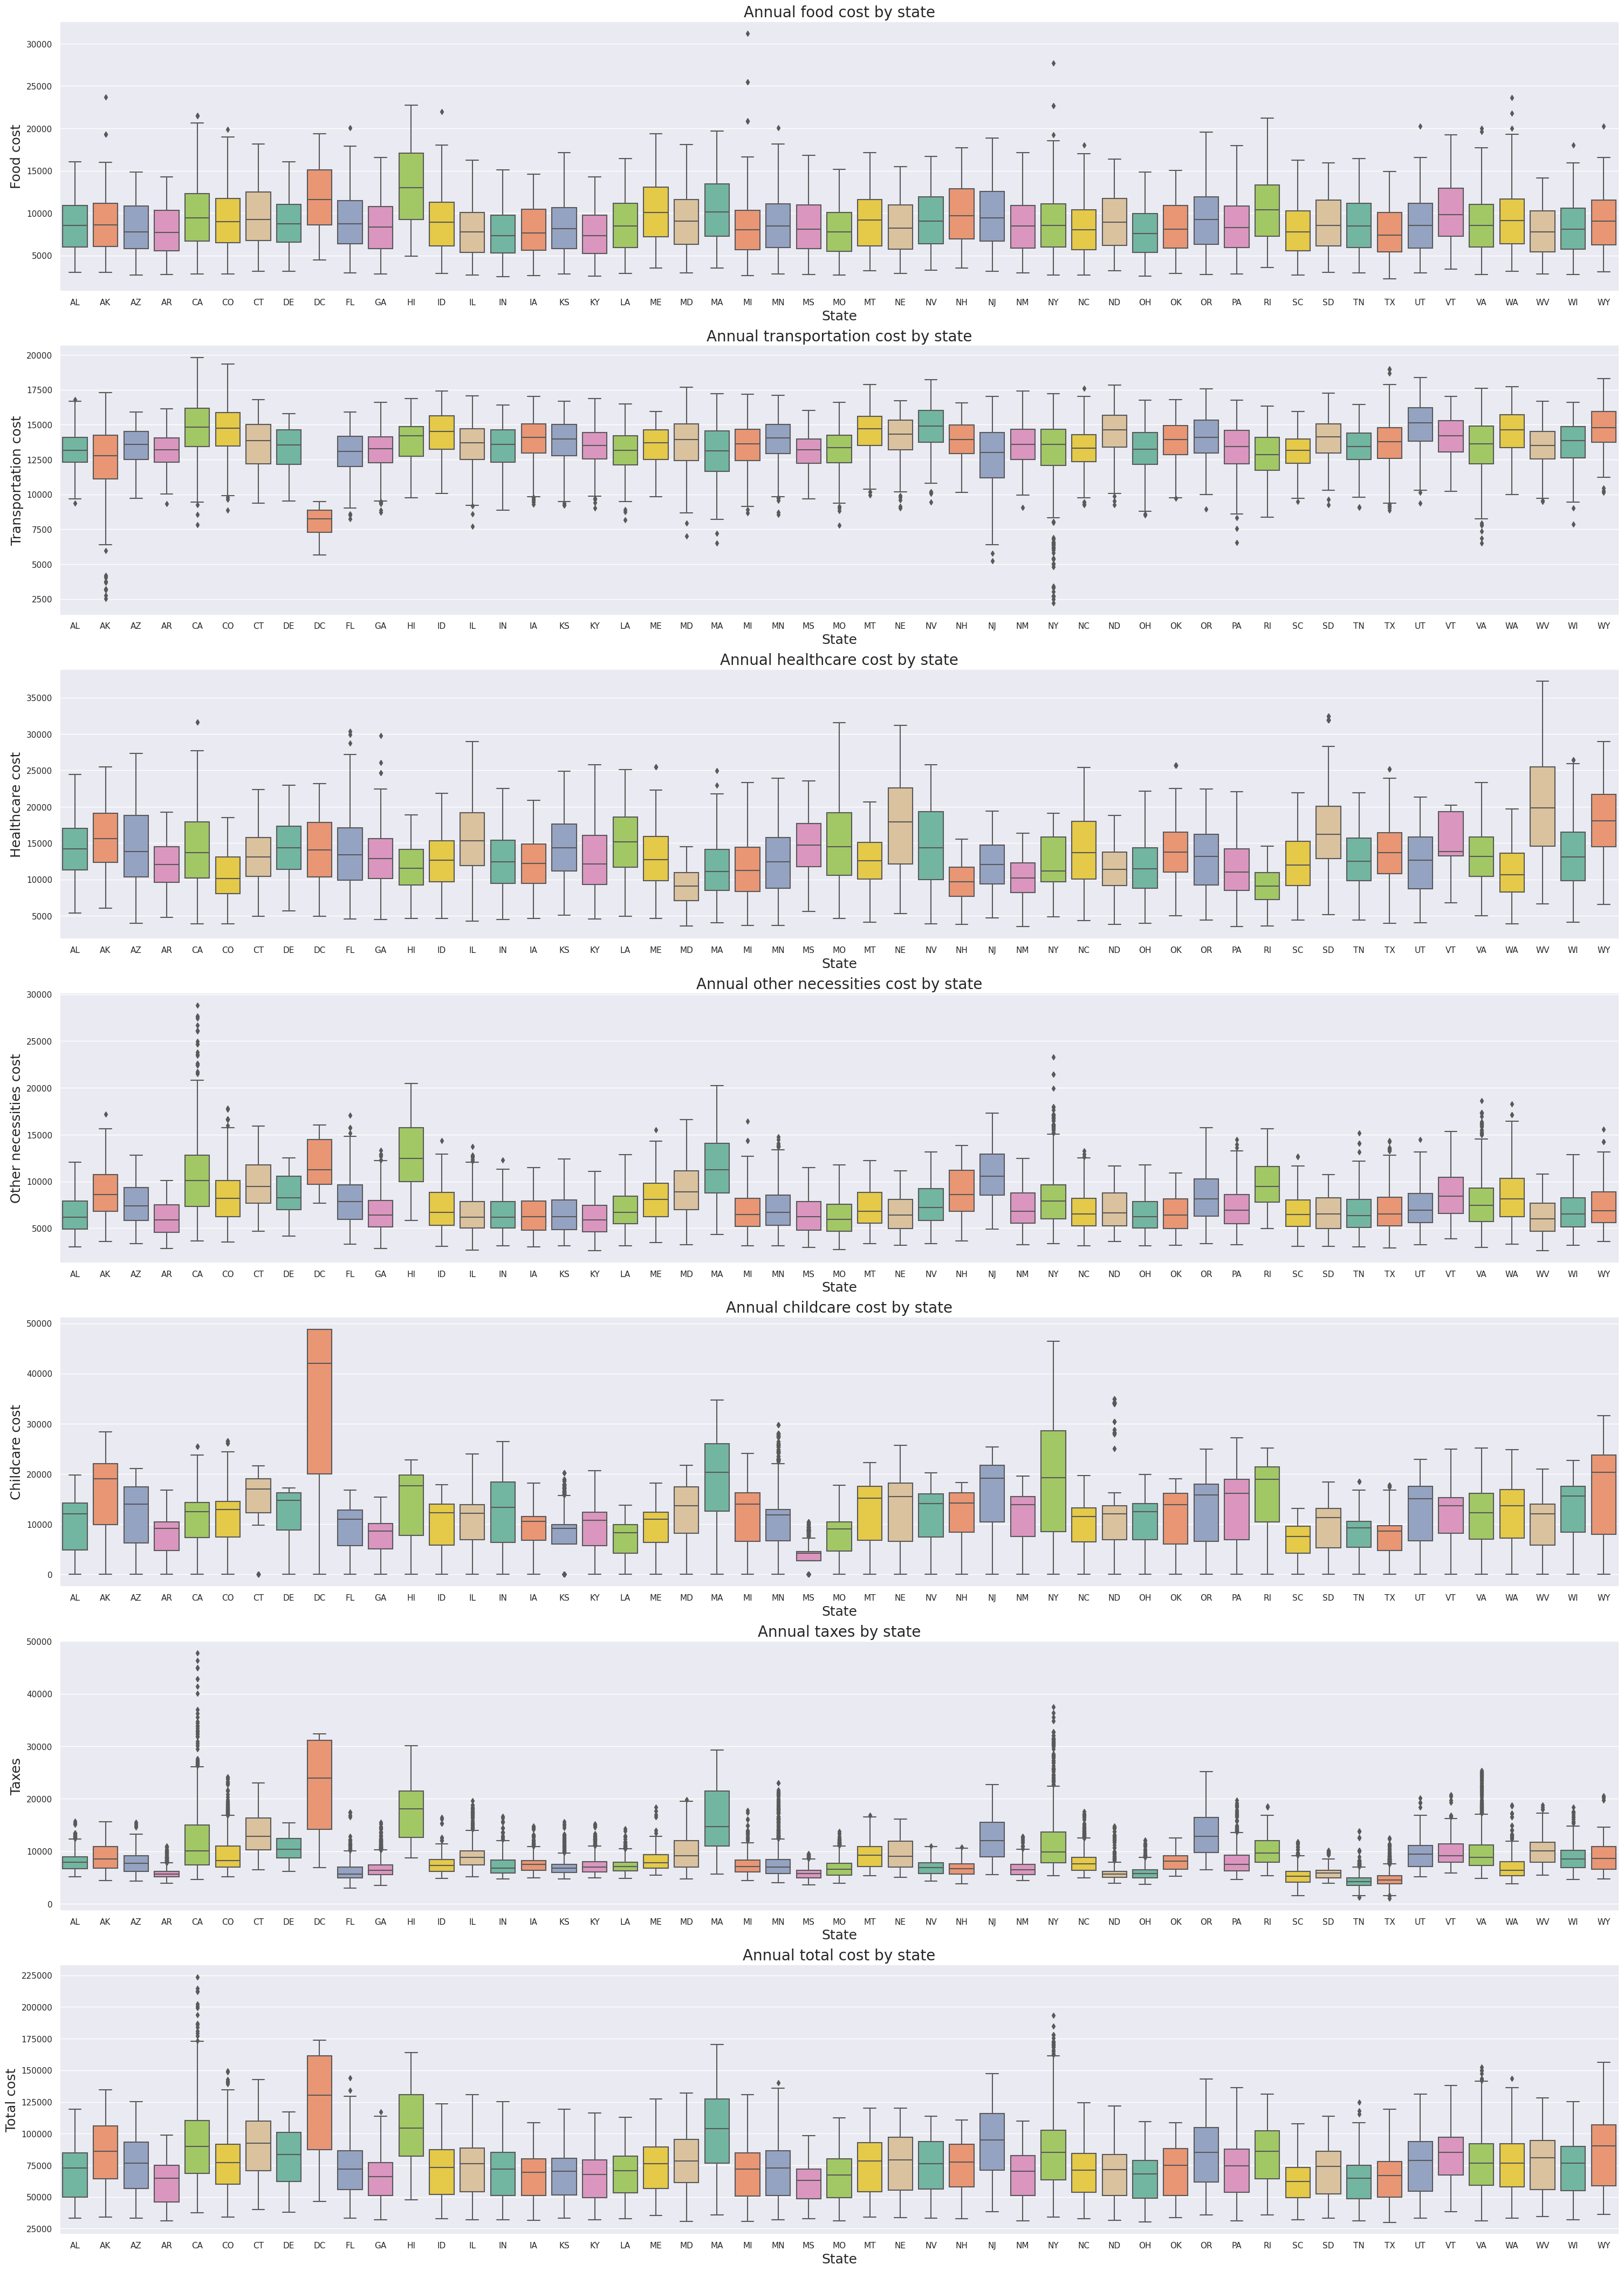

In [136]:
# Create figure and axes with new colors and larger font
fig, ax = plt.subplots(7, 1, figsize=(30, 42), constrained_layout=True)
colors = sns.color_palette('Set2', n_colors=7)  # Set2 color palette with 7 unique colors

# Make a temporary index variable
index = 0

# Iterate through dataframe columns
for col in data_cleaned_copy.iloc[:, 6:13].columns:
    # Make a plot on every iteration
    sns.boxplot(data=data_cleaned_copy, x='state', y=col, ax=ax[index], orient='v', palette=colors)
    ax[index].set_title('Annual {} by state'.format(' '.join(col.split('_'))), fontsize=20)  # Larger font
    ax[index].set_ylabel('{}'.format(' '.join(col.split('_')).capitalize()), fontsize=18)  # Larger font
    ax[index].set_xlabel('State', fontsize=18)  # Larger font
    index += 1

# Display plots
plt.show()




